In [14]:
#Importing libraries needed for my image classification
import numpy as np
import tensorflow as tf
import keras
import splitfolders
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.applications import VGG16

In [15]:
#Specifying the input folder of data
input_folder = r"C:\Users\HP\Downloads\Malaria_data\cell_images"

In [16]:
#Using split folder to divide my data into train(70%), test(10%) and validation(20%)
splitfolders.ratio(input_folder, output = 'Cell_image_main', seed = 42, ratio = (.7, .2, .1), group_prefix = None)

Copying files: 27560 files [05:10, 88.73 files/s] 


In [17]:
#Retrieving the path/directory of the divided datasets for train, train and validation
test_path = r"C:\Users\HP\Downloads\Malaria_data\Cell_image_main\test"
train_path = r"C:\Users\HP\Downloads\Malaria_data\Cell_image_main\train"
val_path = r"C:\Users\HP\Downloads\Malaria_data\Cell_image_main\val"

In [18]:
# initializing image augumentation and normalizing for train dataset 
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    vertical_flip=False
)

#initializing imageDatagen for normazing image for test dataset
test_datagen = ImageDataGenerator(
    rescale = 1./255)
#initializing imageDatagen for normazing image for val dataset
val_datagen = ImageDataGenerator(
    rescale = 1./255)

In [19]:
#fitting our train data to the already intialized imagedataGen, resizing image size and specifying classmode
train_ds = train_datagen.flow_from_directory(
    directory = train_path,    
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary'
)

#fitting initialized val_datagen to validation data resizing image size and specifying classmode
val_ds = val_datagen.flow_from_directory(
    directory = val_path,
    target_size=(160, 160),
    batch_size=32,
    shuffle = False,
    class_mode="binary"
)
#fitting initialized test_datagen to validation data resizing image size and specifying classmode
test_ds = test_datagen.flow_from_directory(
    directory = test_path,
    target_size=(160, 160),
    batch_size=32,
    shuffle = False,
    class_mode="binary"
)

Found 19290 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


In [20]:
#retrieving images and labels of the train dataset
images, labels = next(train_ds)

In [21]:
#previewing the encoded labels ot our train dataset
labels

array([0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

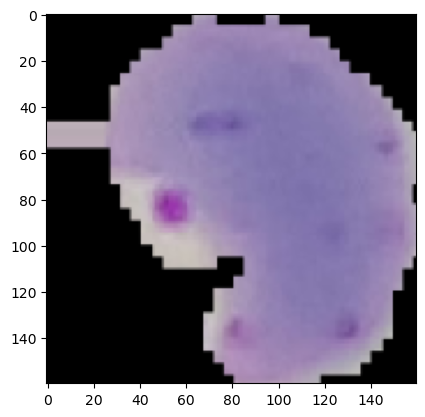

In [22]:
#sample of our cell images
plt.imshow(images[0])

In [24]:
# Building my CNN model architecture
model = models.Sequential()  # Create a sequential model
# Adding the first convolutional layer with 32 filters, a filter size of (3, 3) and input shape of (160, 160, 3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
# Adding a max pooling layer with a pool size of (2, 2)
model.add(layers.MaxPooling2D((2, 2)))
# Adding another convolutional layer with 64 filters and a filter size of (3, 3)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Adding another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Adding one more convolutional layer with 64 filters and a filter size of (3, 3)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Adding another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Flattening the output from the previous layer into a 1D vector
model.add(layers.Flatten())
# Adding a fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))
# Adding the final fully connected layer with 2 units (since is binary classification(2 classes)) and softmax activation
model.add(layers.Dense(2, activation='softmax'))
# Compiling the model with Adam optimizer, SparseCategoricalCrossentropy loss, and accuracy as the evaluation metric
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Print a summary of the model architecture, showing the layer names, output shapes, and total number of parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 64)      

In [26]:
#Training my model
history = model.fit(train_ds, epochs=20, validation_data=val_ds, shuffle=True)

Epoch 1/20
603/603 [==============================] - 510s 845ms/step - loss: 0.4017 - accuracy: 0.8198 - val_loss: 0.1991 - val_accuracy: 0.9338
Epoch 2/20
603/603 [==============================] - 511s 847ms/step - loss: 0.2183 - accuracy: 0.9246 - val_loss: 0.1863 - val_accuracy: 0.9396
Epoch 3/20
603/603 [==============================] - 506s 839ms/step - loss: 0.1897 - accuracy: 0.9371 - val_loss: 0.1580 - val_accuracy: 0.9478
Epoch 4/20
603/603 [==============================] - 484s 803ms/step - loss: 0.1716 - accuracy: 0.9452 - val_loss: 0.1401 - val_accuracy: 0.9541
Epoch 5/20
603/603 [==============================] - 531s 880ms/step - loss: 0.1637 - accuracy: 0.9467 - val_loss: 0.1247 - val_accuracy: 0.9623
Epoch 6/20
603/603 [==============================] - 492s 816ms/step - loss: 0.1517 - accuracy: 0.9505 - val_loss: 0.1396 - val_accuracy: 0.9588
Epoch 7/20
603/603 [==============================] - 508s 843ms/step - loss: 0.1504 - accuracy: 0.9518 - val_loss: 0.1185 -

In [27]:
# Evaluating the model on the test dataset
loss, accuracy = model.evaluate(test_ds, verbose=2)
# Printing the accuracy
print('\naccuracy:', accuracy)

87/87 - 11s - loss: 0.1281 - accuracy: 0.9586 - 11s/epoch - 126ms/step

accuracy: 0.958635687828064


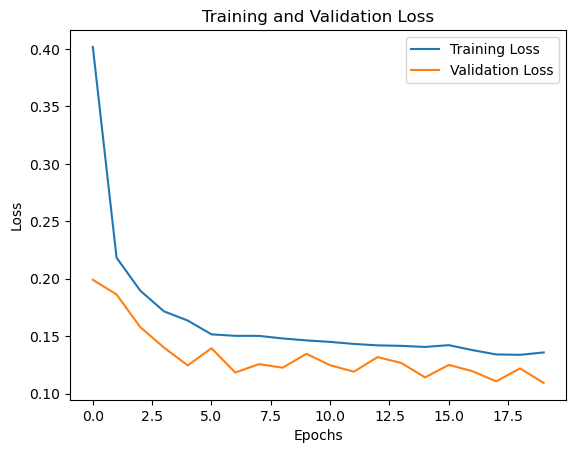

In [28]:
# Ploting the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Seting the title and axis labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

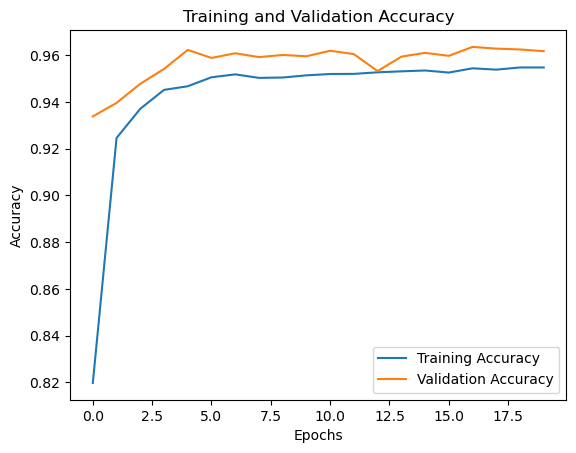

In [29]:
# Ploting the training accuracy and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Seting the title and axis labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

In [30]:
# Obtain the validation dataset predictions
pred = model.predict(test_ds)

87/87 [==============================] - 13s 150ms/step


In [31]:
# Obtaining the predicted class labels
pred = np.argmax(pred, axis=1)
pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [32]:
# Creating our confusion matrix
cm = confusion_matrix(test_ds.classes, pred)

In [33]:
#previewing our confusion matrix
cm

array([[1316,   62],
       [  52, 1326]], dtype=int64)

In [34]:
#Creating our classification report
print(classification_report(test_ds.classes, pred, target_names =["Parasitized", "Uninfected"]))

              precision    recall  f1-score   support

 Parasitized       0.96      0.96      0.96      1378
  Uninfected       0.96      0.96      0.96      1378

    accuracy                           0.96      2756
   macro avg       0.96      0.96      0.96      2756
weighted avg       0.96      0.96      0.96      2756



In [35]:
#printing the classes in my test dataset
classes = test_ds.class_indices
classes

{'Parasitized': 0, 'Uninfected': 1}

<Axes: >

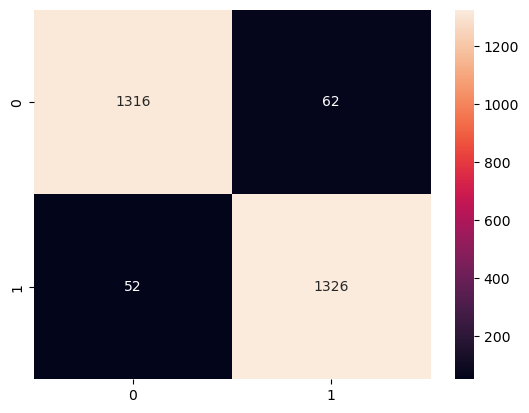

In [36]:
#plotting 
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

In [ ]:
#Clearning their was sign of overfitting, now i added drop out to reduce the overfitting and optimize my model

In [ ]:
#Introducing dropout to our model and carrying out hyper parameter tunning

In [23]:
# Creating a sequential model for the CNN architecture
cnnmodel = models.Sequential()
# Adding a convolutional layer with 32 filters, ReLU activation, and specified input shape
cnnmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
# Adding a max-pooling layer
cnnmodel.add(layers.MaxPooling2D((2, 2)))
# Adding another convolutional layer with 64 filters and ReLU activation
cnnmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Adding another max-pooling layer
cnnmodel.add(layers.MaxPooling2D((2, 2)))
# Adding another convolutional layer with 64 filters and ReLU activation
cnnmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Adding another max-pooling layer
cnnmodel.add(layers.MaxPooling2D((2, 2)))
# Flattening the output of convolutional layers
cnnmodel.add(layers.Flatten())
# Adding a dense layer with 128 units and ReLU activation
cnnmodel.add(layers.Dense(128, activation='relu'))
# Adding dropout with a rate of 0.5
cnnmodel.add(layers.Dropout(0.5))
# Adding a dense layer with softmax activation for classification into 2 classes
cnnmodel.add(layers.Dense(2, activation='softmax'))
# Compiling the CNN model with specified optimizer, loss function, and metrics
cnnmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Printing the summary of the CNN model
cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)      

In [24]:
history = cnnmodel.fit(train_ds, epochs=25, validation_data=val_ds, shuffle=True)

Epoch 1/25
603/603 [==============================] - 407s 672ms/step - loss: 0.5093 - accuracy: 0.7575 - val_loss: 0.2899 - val_accuracy: 0.9274
Epoch 2/25
603/603 [==============================] - 396s 656ms/step - loss: 0.2563 - accuracy: 0.9222 - val_loss: 0.1488 - val_accuracy: 0.9523
Epoch 3/25
603/603 [==============================] - 397s 659ms/step - loss: 0.1867 - accuracy: 0.9413 - val_loss: 0.1403 - val_accuracy: 0.9586
Epoch 4/25
603/603 [==============================] - 401s 664ms/step - loss: 0.1820 - accuracy: 0.9430 - val_loss: 0.1375 - val_accuracy: 0.9585
Epoch 5/25
603/603 [==============================] - 401s 665ms/step - loss: 0.1753 - accuracy: 0.9456 - val_loss: 0.1323 - val_accuracy: 0.9624
Epoch 6/25
603/603 [==============================] - 398s 659ms/step - loss: 0.1641 - accuracy: 0.9481 - val_loss: 0.1335 - val_accuracy: 0.9577
Epoch 7/25
603/603 [==============================] - 397s 658ms/step - loss: 0.1599 - accuracy: 0.9486 - val_loss: 0.1238 -

In [25]:
# Evaluating the model on the test dataset
loss, accuracy = cnnmodel.evaluate(test_ds, verbose=2)
print('\naccuracy:', accuracy)

87/87 - 15s - loss: 0.1380 - accuracy: 0.9575 - 15s/epoch - 174ms/step

accuracy: 0.9575471878051758


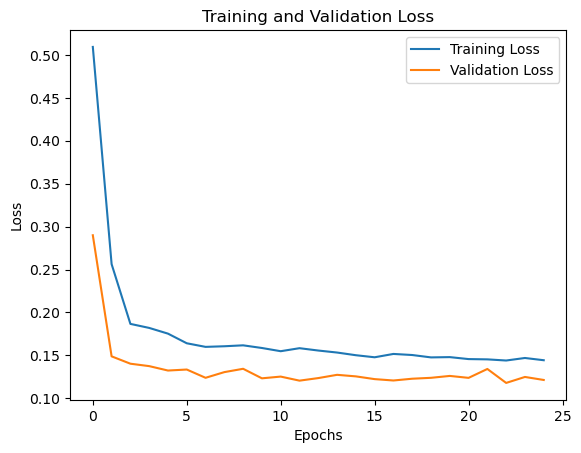

In [26]:
# Ploting the training loss
plt.plot(history.history['loss'], label='Training Loss')

# Ploting the validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Seting the title and axis labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

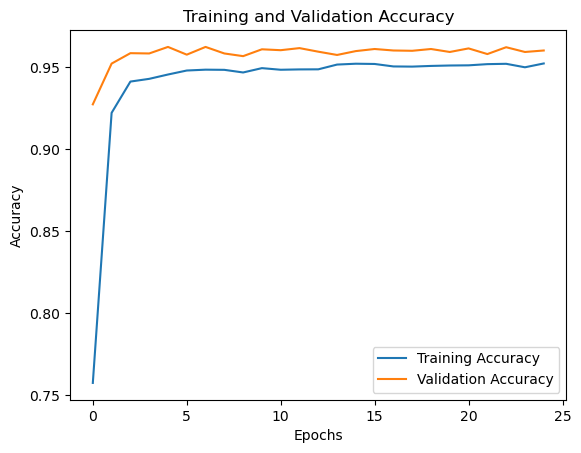

In [27]:
# Ploting the training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Ploting the validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Seting the title and axis labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Showing the legend
plt.legend()

# Display the plot
plt.show()

In [28]:
# Obtain the validation dataset predictions
pred_cnn = cnnmodel.predict(test_ds)

87/87 [==============================] - 11s 117ms/step


In [29]:
# Geting the predicted class labels by selecting the indices of the maximum values
pred = np.argmax(pred_cnn, axis=1)

In [30]:
# Calculating the confusion matrix
cm = confusion_matrix(test_ds.classes, pred)

In [31]:
#Printing confusion matrix
cm

array([[1299,   79],
       [  38, 1340]], dtype=int64)

In [32]:
#printing classification report
print(classification_report(test_ds.classes, pred, target_names =["Parasitized", "Uninfected"]))

              precision    recall  f1-score   support

 Parasitized       0.97      0.94      0.96      1378
  Uninfected       0.94      0.97      0.96      1378

    accuracy                           0.96      2756
   macro avg       0.96      0.96      0.96      2756
weighted avg       0.96      0.96      0.96      2756



<Axes: >

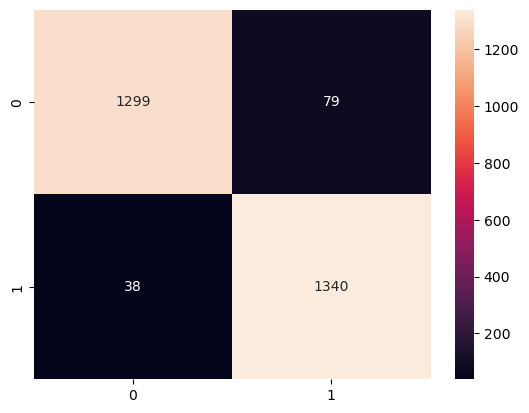

In [33]:
# Creating a heatmap to visualize the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

In [ ]:
# Using VGG 16 AS My Transfer learning.

In [35]:
# Creating a VGG16 model with specified input shape, pretrained weights as my custom model, and excluding the top (fully connected) layers
vgg = VGG16(input_shape=(160, 160, 3), weights='imagenet', include_top=False)

In [36]:
# Creating vgg16 layers 

# Freezing the layers in the VGG16 model
for layer in vgg.layers:
    layer.trainable = False

# Flattening the output of the VGG16 model
x = layers.Flatten()(vgg.output)

# Adding a dense layer with ReLU activation
x = layers.Dense(64, activation="relu")(x)

# Adding dropout with a rate of 0.5
x = Dropout(0.5)(x)

# Adding a dense layer with softmax activation for classification
x = layers.Dense(2, activation="softmax")(x)


In [37]:
# Creating a new model by specifying the inputs and outputs
vgg16Model = models.Model(inputs=vgg.input, outputs=x)

In [38]:
# Compiling the model with specified optimizer, loss function, and metrics
vgg16Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Printing the summary of the compiled model
vgg16Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

In [39]:
# Training the vgg16Model using the training dataset and validate on the validation dataset
vggi6history = vgg16Model.fit(train_ds, epochs=25, validation_data=val_ds, shuffle=True)

Epoch 1/25
603/603 [==============================] - 2542s 4s/step - loss: 0.4479 - accuracy: 0.8013 - val_loss: 0.3338 - val_accuracy: 0.8365
Epoch 2/25
603/603 [==============================] - 2520s 4s/step - loss: 0.3460 - accuracy: 0.8649 - val_loss: 0.2173 - val_accuracy: 0.9224
Epoch 3/25
603/603 [==============================] - 14708s 24s/step - loss: 0.3142 - accuracy: 0.8802 - val_loss: 0.2194 - val_accuracy: 0.9334
Epoch 4/25
603/603 [==============================] - 10252s 17s/step - loss: 0.2964 - accuracy: 0.8878 - val_loss: 0.2109 - val_accuracy: 0.9213
Epoch 5/25
603/603 [==============================] - 2569s 4s/step - loss: 0.2903 - accuracy: 0.8908 - val_loss: 0.1994 - val_accuracy: 0.9193
Epoch 6/25
603/603 [==============================] - 2465s 4s/step - loss: 0.2814 - accuracy: 0.8942 - val_loss: 0.2231 - val_accuracy: 0.9029
Epoch 7/25
603/603 [==============================] - 2170s 4s/step - loss: 0.2759 - accuracy: 0.8975 - val_loss: 0.1921 - val_accur

In [40]:
# Evaluating the vgg16Model on the test dataset and obtain loss and accuracy
loss, accuracy = vgg16Model.evaluate(test_ds, verbose=2)

# Printing the accuracy
print('\naccuracy:', accuracy)

87/87 - 237s - loss: 0.2070 - accuracy: 0.9234 - 237s/epoch - 3s/step

accuracy: 0.9234397411346436


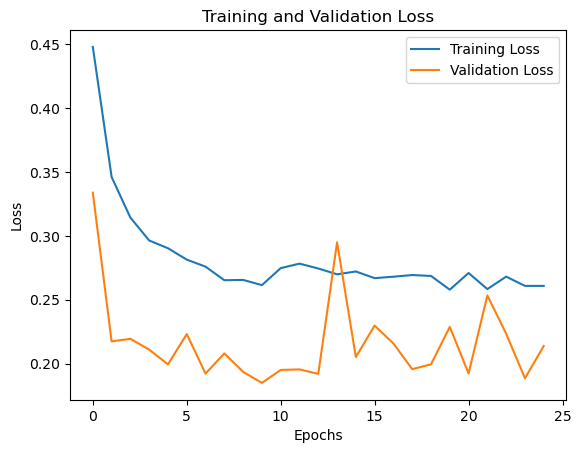

In [42]:
# Ploting the training loss and validation loss over epochs
plt.plot(vggi6history.history['loss'], label='Training Loss')
plt.plot(vggi6history.history['val_loss'], label='Validation Loss')

# Seting the title and axis labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

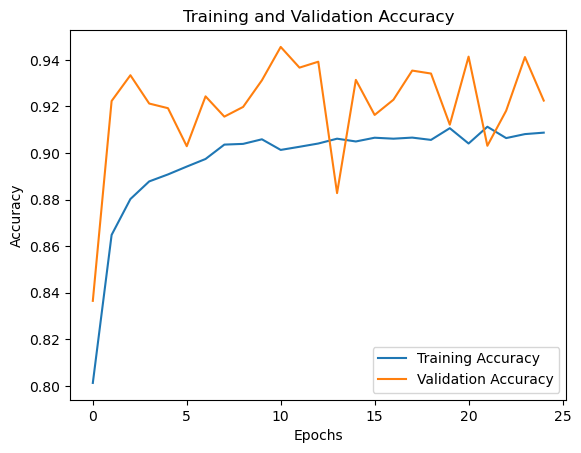

In [43]:
# Ploting the training accuracy and validation accuracy over epochs
plt.plot(vggi6history.history['accuracy'], label='Training Accuracy')
plt.plot(vggi6history.history['val_accuracy'], label='Validation Accuracy')

# Seting the title and axis labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()

In [44]:
# Obtain predictions from the vgg16Model on the validation dataset
pred_vgg = vgg16Model.predict(test_ds)

87/87 [==============================] - 226s 3s/step


In [45]:
# Geting the predicted class labels by selecting the indices of the maximum values
pred = np.argmax(pred_vgg, axis=1)

In [47]:
# Calculating the confusion matrix for the VGG16 model predictions
cm_vgg = confusion_matrix(test_ds.classes, pred)

In [48]:
#printing the confusion matrix of our vgg model
cm_vgg

array([[1192,  186],
       [  25, 1353]], dtype=int64)

In [49]:
#printing the classification report of our vgg model
print(classification_report(test_ds.classes, pred, target_names =["Parasitized", "Uninfected"]))

              precision    recall  f1-score   support

 Parasitized       0.98      0.87      0.92      1378
  Uninfected       0.88      0.98      0.93      1378

    accuracy                           0.92      2756
   macro avg       0.93      0.92      0.92      2756
weighted avg       0.93      0.92      0.92      2756



<Axes: >

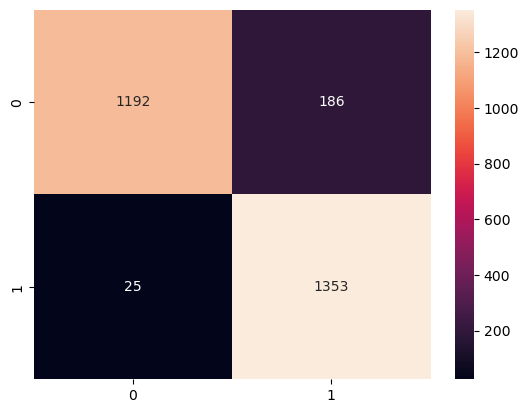

In [50]:
# Create a heatmap to visualize the confusion matrix for VGG16 model predictions
ax = plt.subplot()
sns.heatmap(cm_vgg, annot=True, fmt='g', ax=ax)